In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from PIL import Image

In [6]:
#Reading CSV file data
my_data=pd.read_csv('../data/image_data.csv')

In [7]:
my_data.head()

,FileName,Label,Format
0,Cov-Atlas+(44)V,covid,jpg
1,Cov-Atlas+(45)V,covid,jpg
2,Cov-Atlas-+(43)V,covid,jpg
3,Cov-Atlas-Day+1V,covid,jpg
4,Cov-Atlas-Day+2V,covid,jpg


In [8]:
#35 covid - 50 pneu - 66 regular -Total 151
Image.open('picturepervideodata.png')

FileNotFoundError: [Errno 2] No such file or directory: 'picturepervideodata.png'

In [13]:
#Setting path for our convex image dataset
images_path='../data/pocus_images/convex/'

In [14]:
#Converting our data into a numpy array to be able to access it more freely
data_array=my_data.to_numpy()

# Image preProcessing

In [15]:
#Increasing Images contrast- resizing images to 224x224 - Incrasing Image contrast
images_data=[]
for i in data_array:
    img = cv2.imread(images_path+i[0]+'.'+i[2], cv2.IMREAD_GRAYSCALE)
    img=cv2.equalizeHist(img)
    img=cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    img_1d=img.reshape(224*224)
    images_data.append(img_1d)

### Initializing our X and y

In [16]:
#Initializing our X and y for our model
X=np.asarray(images_data)
y=np.asarray(my_data['Label'])

In [17]:
X.shape

(151, 50176)

In [18]:
y.shape

(151,)

In [19]:
# Splitting our set to Train and test  80 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(120, 50176)

# Multilabel SGD Model

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn import metrics
import matplotlib.ticker as mticker

In [22]:
sgd_clf_multi=SGDClassifier(random_state=42)
sgd_clf_multi.fit( X_train, y_train)

SGDClassifier(random_state=42)

In [23]:
# 5 fold Cross validation
cross_validate(sgd_clf_multi,X_train,y_train,cv=5,scoring="accuracy")

{'fit_time': array([0.48171353, 0.42786789, 0.40293384, 0.47572613, 0.4517684 ]),
 'score_time': array([0.032938  , 0.00597358, 0.00697064, 0.00702024, 0.00598407]),
 'test_score': array([0.83333333, 0.83333333, 0.66666667, 0.66666667, 0.70833333])}

In [24]:
#getting our y_predict for our confusion matrix
y_train_predict=cross_val_predict(sgd_clf_multi,X_train,y_train,cv=5)
conf_matrix=confusion_matrix(y_train,y_train_predict)
conf_matrix

array([[13,  7,  6],
       [ 3, 30,  6],
       [ 3,  6, 46]], dtype=int64)

<ipython-input-25-c5a8e6bca70d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-25-c5a8e6bca70d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


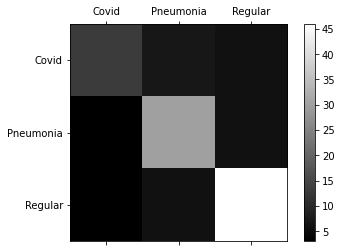

In [25]:
alpha = ['Covid','Pneumonia','Regular']
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(conf_matrix, cmap=plt.cm.gray)
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.show()

In [26]:
print(metrics.classification_report(y_train, y_train_predict, digits=3))

              precision    recall  f1-score   support

       covid      0.684     0.500     0.578        26
   pneumonia      0.698     0.769     0.732        39
     regular      0.793     0.836     0.814        55

    accuracy                          0.742       120
   macro avg      0.725     0.702     0.708       120
weighted avg      0.738     0.742     0.736       120



In [27]:
# 5 fold Cross validation
cross_validate(sgd_clf_multi,X_test,y_test,cv=5,scoring="accuracy")

{'fit_time': array([0.10671449, 0.07776093, 0.10076404, 0.07878923, 0.07677913]),
 'score_time': array([0.00199628, 0.00199318, 0.00195694, 0.00198889, 0.00397038]),
 'test_score': array([0.71428571, 0.5       , 0.83333333, 0.66666667, 0.83333333])}

In [30]:
y_train_predict=cross_val_predict(sgd_clf_multi,X_test,y_test,cv=5)
conf_matrix=confusion_matrix(y_test,y_train_predict)
conf_matrix

array([[5, 1, 3],
       [2, 9, 0],
       [0, 3, 8]], dtype=int64)

In [31]:
print(metrics.classification_report(y_test, y_train_predict, digits=3))

              precision    recall  f1-score   support

       covid      0.714     0.556     0.625         9
   pneumonia      0.692     0.818     0.750        11
     regular      0.727     0.727     0.727        11

    accuracy                          0.710        31
   macro avg      0.711     0.700     0.701        31
weighted avg      0.711     0.710     0.706        31

